<a href="https://colab.research.google.com/github/Bgisemba/Coffe-customer-satisfaction/blob/prep/Coffee_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT**

Coffee House is a multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington. It is the world's largest coffeehouse chain. We have a large customer base and have consistently experienced high retention rates in the past.

Over the past year, Coffee House noticed a decline in the number of repeat customers and a corresponding decline in revenue. After reviewing customer feedback and conducting surveys, they have determined that the decline in retention rates is likely due to a combination of factors, including a lack of variety in our product offerings, poor customer service, and increased competition from other retailers. They have decided to conduct a data analysis project to better understand the factors contributing to the decline in retention rates and identify potential solutions to improve retention and increase revenue.

**OBJECTIVES**
1. Cleaning and preparing the given dataset for analysis.
2. Exploring data to identify trends and patterns.
3. Modeling data using statistics to identify factors contributing to retention rates.
4. Developing solutions to the given problem statement in the light of your data insights using visualizations.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING AND PREVIEWINGTHE DATASET**

In [51]:
#Loading the dataset
df=pd.read_excel('/content/coffee-house-satisfactory-survey.xlsx')

In [52]:
#Previewing the top
df.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,7. How much time do you normally spend during your visit?,8. The nearest Coffee House's outlet to you is...?,9. Do you have Coffee House membership card?,...,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,20. Will you continue buying Coffee House?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [4]:
#previewing the bottom of the dataset
df.tail

<bound method NDFrame.tail of                         Timestamp 1. Your Gender    2. Your Age  \
0    2019/10/01 12:38:43 PM GMT+8         Female  From 20 to 29   
1    2019/10/01 12:38:54 PM GMT+8         Female  From 20 to 29   
2    2019/10/01 12:38:56 PM GMT+8           Male  From 20 to 29   
3    2019/10/01 12:39:08 PM GMT+8         Female  From 20 to 29   
4    2019/10/01 12:39:20 PM GMT+8           Male  From 20 to 29   
..                            ...            ...            ...   
117  2019/10/04 12:24:26 AM GMT+8           Male   40 and above   
118   2019/10/04 9:30:09 AM GMT+8           Male  From 20 to 29   
119   2019/10/04 1:46:07 PM GMT+8           Male  From 20 to 29   
120  2019/10/05 11:01:14 AM GMT+8         Female  From 20 to 29   
121   2019/10/05 4:57:22 PM GMT+8           Male  From 20 to 29   

    3. Are you currently....? 4. What is your annual income?  \
0                     Student             Less than RM25,000   
1                     Student        

In [5]:
#Looking at the nuber of records
df.shape

(122, 21)

In [6]:
#cheking the data types of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                     --------------  ----- 
 0   Timestamp                                                                                                                  122 non-null    object
 1   1. Your Gender                                                                                                             122 non-null    object
 2   2. Your Age                                                                                                                122 non-null    object
 3   3. Are you currently....?                                                                                                  122 non-null

In [7]:
#Checking for duplicates
df.duplicated().sum()

0

There are no duplicates

In [8]:
#checking for missing values
df.isnull().sum()

Timestamp                                                                                                                    0
1. Your Gender                                                                                                               0
2. Your Age                                                                                                                  0
3. Are you currently....?                                                                                                    0
4. What is your annual income?                                                                                               0
5. How often do you visit Coffee House?                                                                                      0
6. How do you usually enjoy Coffee House?                                                                                    1
7. How much time do you normally  spend during your visit?                                                     

There are no missing values

In [9]:
#viewing the columns
df.columns

Index(['Timestamp', '1. Your Gender', '2. Your Age',
       '3. Are you currently....?', '4. What is your annual income?',
       '5. How often do you visit Coffee House?',
       '6. How do you usually enjoy Coffee House?',
       '7. How much time do you normally  spend during your visit?',
       '8. The nearest Coffee House's outlet to you is...?',
       '9. Do you have Coffee House membership card?',
       '10. What do you most frequently purchase at Coffee House?',
       '11. On average, how much would you spend at Coffee House per visit?',
       '12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
       '13. How would you rate the price range at Coffee House?',
       '14. How important are sales and promotions in your purchase decision?',
       '15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)',
       '16. You rate the WiFi quality at Coffee House as..',
       '17. How 

In [54]:
#list of irrelevant columns
col=['Timestamp']

In [55]:
df.drop(col,inplace=True,axis=1)

In [56]:
df.columns

Index(['1. Your Gender', '2. Your Age', '3. Are you currently....?',
       '4. What is your annual income?',
       '5. How often do you visit Coffee House?',
       '6. How do you usually enjoy Coffee House?',
       '7. How much time do you normally  spend during your visit?',
       '8. The nearest Coffee House's outlet to you is...?',
       '9. Do you have Coffee House membership card?',
       '10. What do you most frequently purchase at Coffee House?',
       '11. On average, how much would you spend at Coffee House per visit?',
       '12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
       '13. How would you rate the price range at Coffee House?',
       '14. How important are sales and promotions in your purchase decision?',
       '15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)',
       '16. You rate the WiFi quality at Coffee House as..',
       '17. How would you rat

In [57]:
#renaming columns
df.rename(columns={'1. Your Gender':'Gender', '2. Your Age':'Age',
       '3. Are you currently....?':'Employment_status', '4. What is your annual income?':'Annual_income',
       '5. How often do you visit Coffee House?':'How often do you visit Coffee House?',
       '6. How do you usually enjoy Coffee House?':'How do you usually enjoy Coffee House?',
       '7. How much time do you normally  spend during your visit?':'time_spent',
       '9. Do you have Coffee House membership card?':'membership_card',
       '10. What do you most frequently purchase at Coffee House?':'frequent_purchase',
       '11. On average, how much would you spend at Coffee House per visit?':'average_spend',
       '12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:':'Rate on the coffee House compared to other brands',
       '13. How would you rate the price range at Coffee House?':'Rate on the Price Range',
       '14. How important are sales and promotions in your purchase decision?':'Rate on the Importance of promotions',
       '15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)':'Rate on the ambience',
       '16. You rate the WiFi quality at Coffee House as..':'Rate on the Wifi',
       '17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)':'Rate on the service proided',
       '18. How likely you will choose Coffee House for doing business meetings or hangout with friends?':'Prefered for which occasion',
       '20. Will you continue buying Coffee House?':'continue_purchase'},inplace=True)

In [58]:
df.rename(columns={df.columns[11]:'rate_quality'},inplace=True)
df.rename(columns={df.columns[12]:'rate_price'},inplace=True)
df.rename(columns={df.columns[13]:'purchase_decision'},inplace=True)
df.rename(columns={df.columns[14]:'rate_ambience'},inplace=True)
df.rename(columns={df.columns[15]:'wifi_quality'},inplace=True)
df.rename(columns={df.columns[16]:'rate_service'},inplace=True)
df.rename(columns={df.columns[17]:'rate_meetings'},inplace=True)
df.rename(columns={df.columns[18]:'promotion_hear'},inplace=True)
df.rename(columns={df.columns[7]:'nearest_outlet'},inplace=True)

In [59]:
df.columns

Index(['Gender', 'Age', 'Employment_status', 'Annual_income',
       'How often do you visit Coffee House?',
       'How do you usually enjoy Coffee House?', 'time_spent',
       'nearest_outlet', 'membership_card', 'frequent_purchase',
       'average_spend', 'rate_quality', 'rate_price', 'purchase_decision',
       'rate_ambience', 'wifi_quality', 'rate_service', 'rate_meetings',
       'promotion_hear', 'continue_purchase'],
      dtype='object')

In [16]:
#viewing the new column names
df.columns

Index(['Gender', 'Age', 'Employment_status', 'Annual_income',
       'How often do you visit Coffee House?',
       'How do you usually enjoy Coffee House?', 'time_spent',
       'nearest_outlet', 'membership_card', 'frequent_purchase',
       'average_spend', 'rate_quality', 'rate_price', 'purchase_decision',
       'rate_ambience', 'wifi_quality', 'rate_service', 'rate_meetings',
       'promotion_hear', 'continue_purchase'],
      dtype='object')

In [17]:
#iewing the new dataset
df.head()

,Gender,Age,Employment_status,Annual_income,How often do you visit Coffee House?,How do you usually enjoy Coffee House?,time_spent,nearest_outlet,membership_card,frequent_purchase,average_spend,rate_quality,rate_price,purchase_decision,rate_ambience,wifi_quality,rate_service,rate_meetings,promotion_hear,continue_purchase
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [18]:
df.tail()

,Gender,Age,Employment_status,Annual_income,How often do you visit Coffee House?,How do you usually enjoy Coffee House?,time_spent,nearest_outlet,membership_card,frequent_purchase,average_spend,rate_quality,rate_price,purchase_decision,rate_ambience,wifi_quality,rate_service,rate_meetings,promotion_hear,continue_purchase
117,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee;Cold drinks;Juices;Pastries;Sandwiches,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Cold drinks,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No
120,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Coffee,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes
121,Male,From 20 to 29,Employed,"RM50,000 - RM100,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee,Less than RM20,1,1,5,4,3,3,2,In Store displays,No


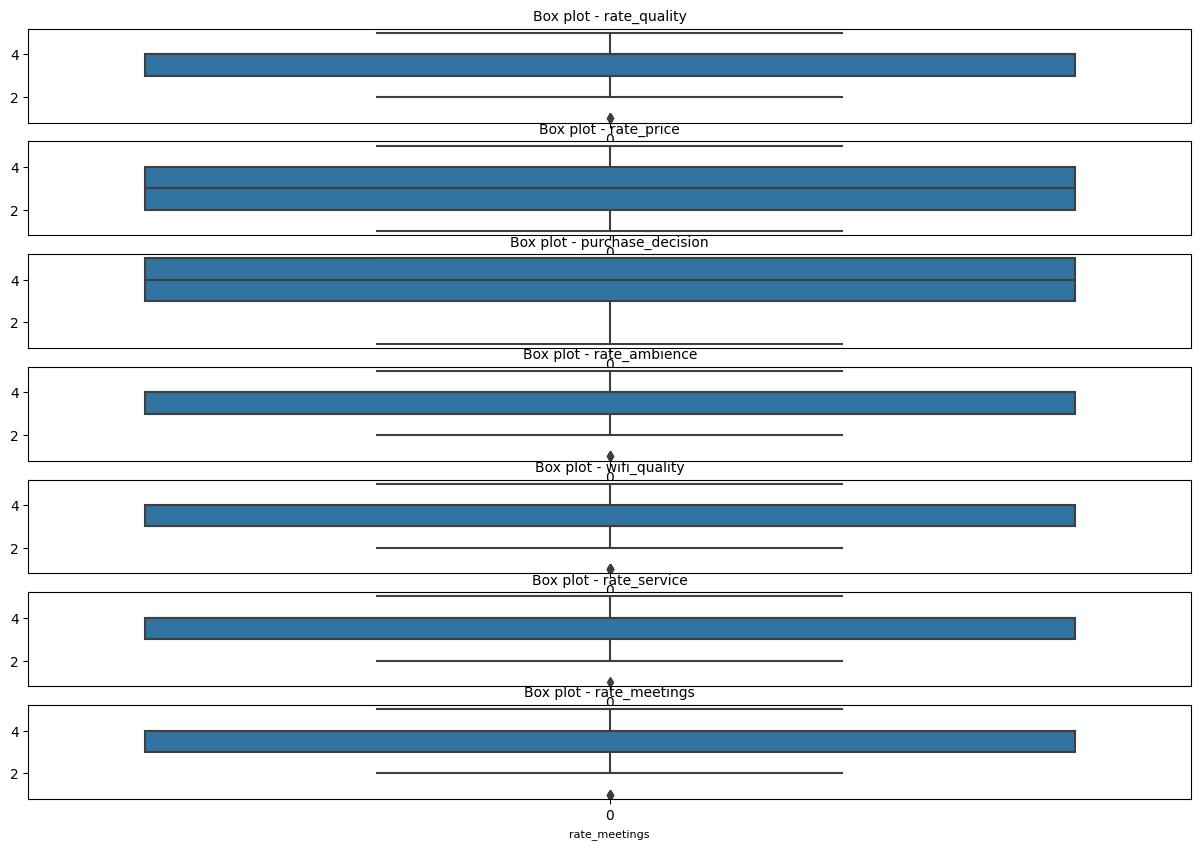

In [19]:
#checking for outliers
#checking for outliers
col_names=['rate_quality', 'rate_price', 'purchase_decision',
       'rate_ambience', 'wifi_quality', 'rate_service', 'rate_meetings']

fig, ax = plt.subplots(len(col_names), figsize=(15,10))

for i, col_val in enumerate(col_names):
    sns.boxplot(df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

No outliers in our dataset

In [20]:
#Displaying unique values
#x = 1
#for i in range(0,20):
#    print(f'''
#          {df.columns[x]}
#          {df.iloc[:,x].unique()}
 #         ''')
 #   x = x + 1

EXPLANATORY DATA ANALYSIS

univariate

In [21]:
df.columns

Index(['Gender', 'Age', 'Employment_status', 'Annual_income',
       'How often do you visit Coffee House?',
       'How do you usually enjoy Coffee House?', 'time_spent',
       'nearest_outlet', 'membership_card', 'frequent_purchase',
       'average_spend', 'rate_quality', 'rate_price', 'purchase_decision',
       'rate_ambience', 'wifi_quality', 'rate_service', 'rate_meetings',
       'promotion_hear', 'continue_purchase'],
      dtype='object')

In [22]:
#Gender distribution of the customers
df['Gender'].value_counts()

Female    65
Male      57
Name: Gender, dtype: int64

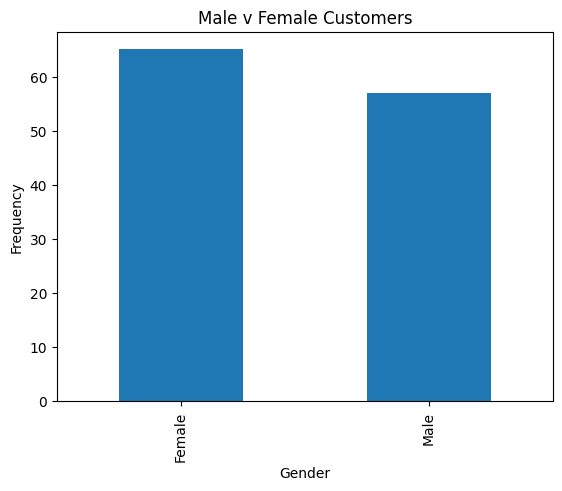

In [23]:
#Bar chart showing Gender distribution
df['Gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Male v Female Customers')
plt.show()

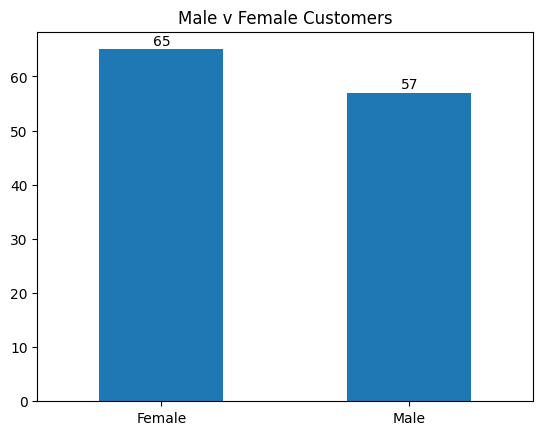

In [24]:
ax = plt.axes()
df['Gender'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0)
plt.title('Male v Female Customers')
plt.show()

In [25]:
#Age distribution of the customers
df['Age'].value_counts()

From 20 to 29    85
From 30 to 39    17
Below 20         13
40 and above      7
Name: Age, dtype: int64

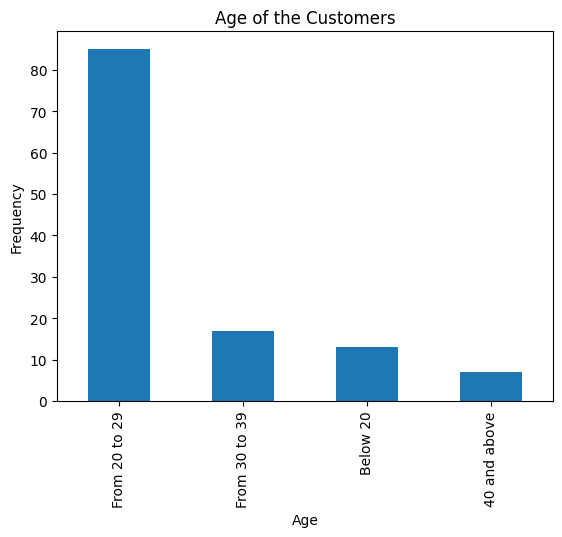

In [26]:
#Bar chart showing Age distribution
df['Age'].value_counts().plot.bar()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age of the Customers')
plt.show()

In [27]:
#Occupation distribution of the customers
df['Employment_status'].value_counts()

Employed         61
Student          42
Self-employed    17
Housewife         2
Name: Employment_status, dtype: int64

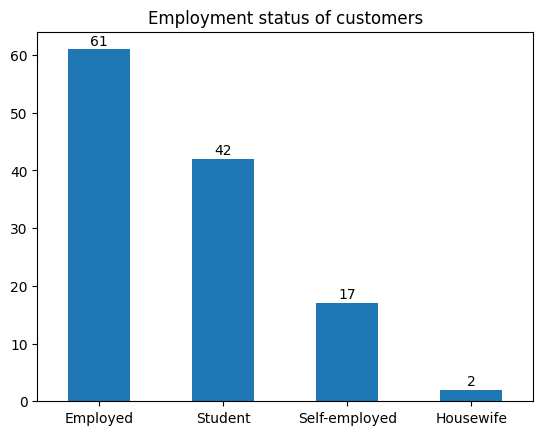

In [28]:
ax = plt.axes()
df['Employment_status'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0)
plt.title('Employment status of customers')
plt.show()

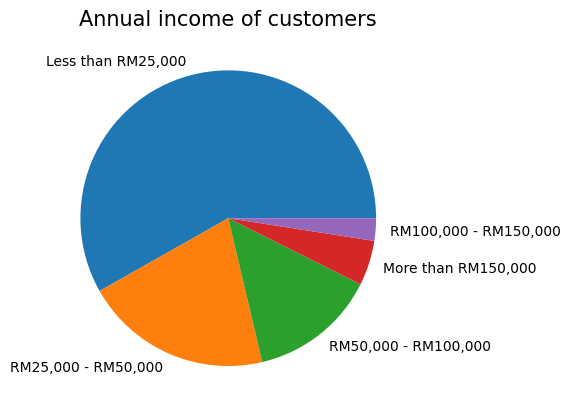

In [29]:
ax = plt.axes()
df['Annual_income'].value_counts().plot(kind='pie')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Annual income of customers',fontsize=15)
plt.ylabel(None)
plt.show()

Customer Profile analysis:
*   There are slighlty more female customers then male
*   Majority of the customers are in the age range of 20-29


*   Most of the customers are employed
*   More than half of the customers earn an annual income of less than RM25,000.


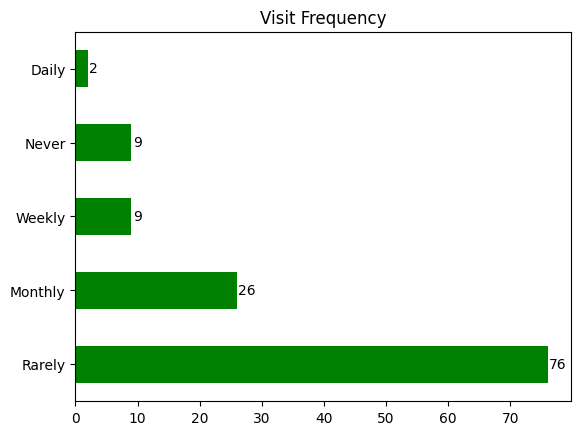

In [30]:
#How often do you visit Coffee House?
ax = plt.axes()
df['How often do you visit Coffee House?'].value_counts().plot.barh(color='g')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0)
plt.title('Visit Frequency')
plt.show()

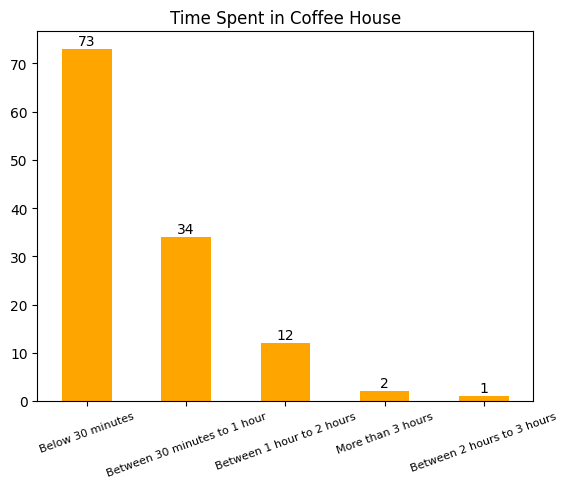

In [31]:
#Time spent at the coffee shop
ax = plt.axes()
df['time_spent'].value_counts().plot.bar(color='orange')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=20,fontsize=8)
plt.title('Time Spent in Coffee House')
plt.show()

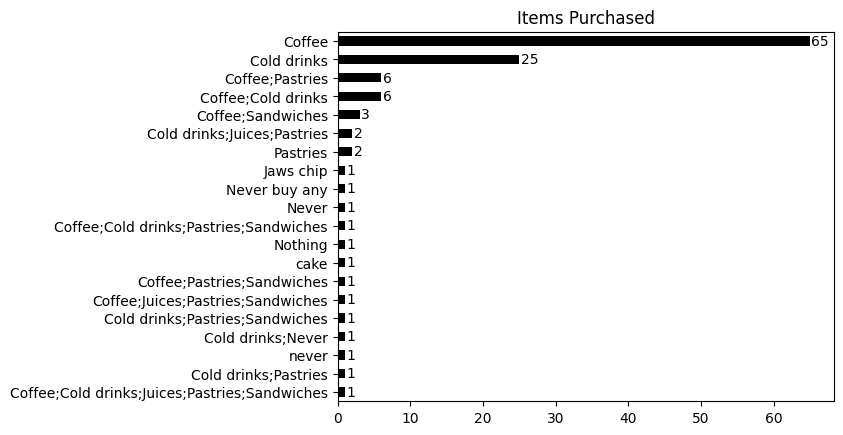

In [32]:
#Frequency of the Items purchased
ax = plt.axes()
df['frequent_purchase'].value_counts(ascending=True).plot.barh(color='black')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0,fontsize=10)
plt.title('Items Purchased')
plt.show()

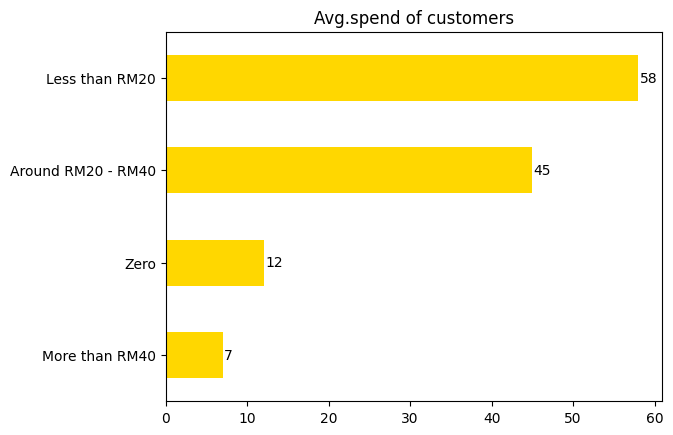

In [33]:
#Average amount spent buy the customers
ax = plt.axes()
df['average_spend'].value_counts(ascending=True).plot.barh(color='gold')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(rotation=0,fontsize=10)
plt.title('Avg.spend of customers')
plt.show()

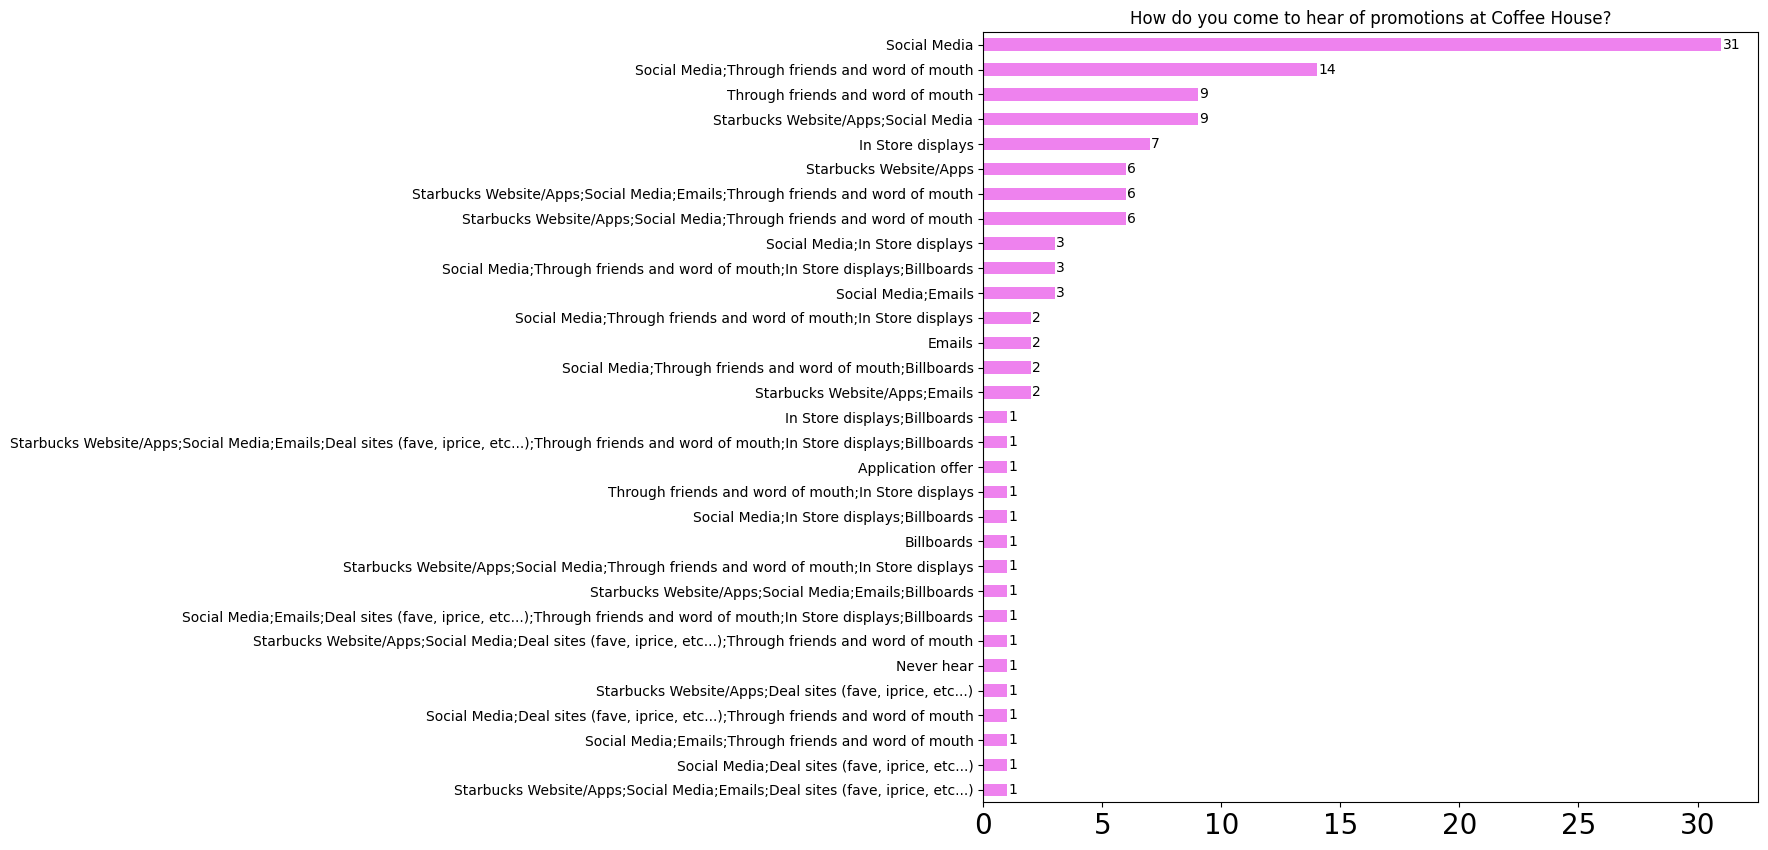

In [34]:
#How customers had of the promotions at the coffee house
ax = plt.axes()
df['promotion_hear'].value_counts(ascending=True).plot.barh(color='violet',figsize=(10,10))
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.xticks(fontsize=20)
plt.title('How do you come to hear of promotions at Coffee House?')
plt.show()



**Customer Analysis**
1.   Most customers spend less than 30 minutes at the coffee house
2.   Coffee is the most purchased commodity
3.   Most customers spend less han RM20
4.   Most customers heard of the promotions frmo the social media.
5.   Customers rarely visit the coffee house




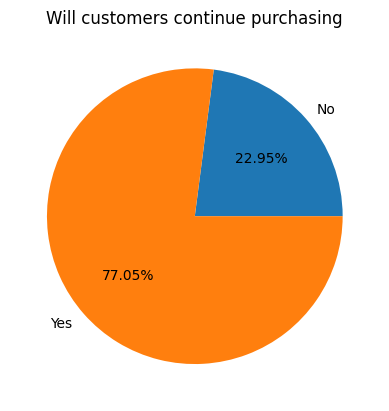

In [35]:
#Response of he customers on whether they will continue purchasing
df['continue_purchase'].value_counts(ascending=True).plot(kind='pie',autopct='%0.2f%%')
plt.title('Will customers continue purchasing')
plt.ylabel(None)
plt.show()

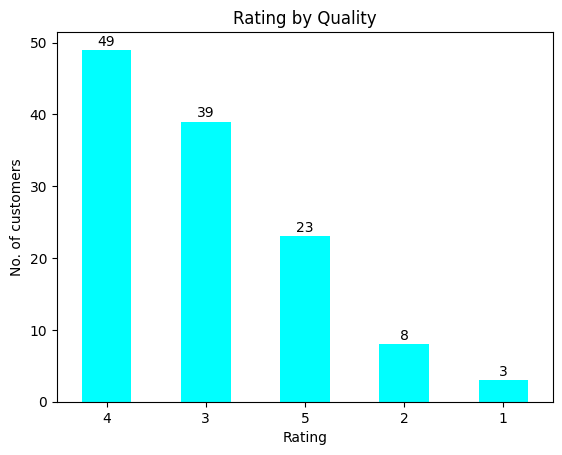

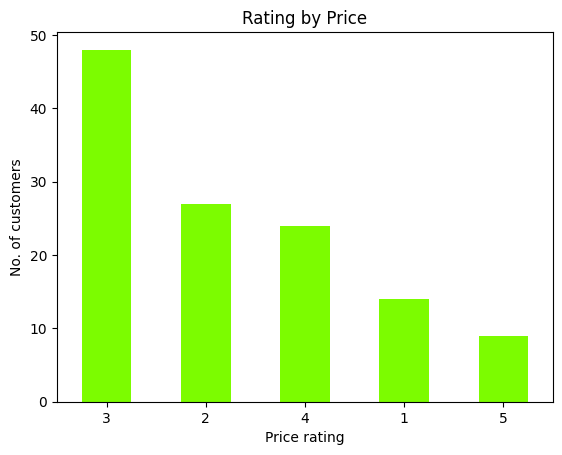

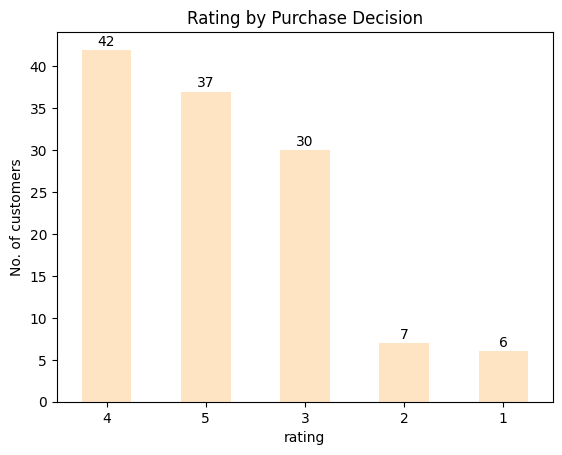

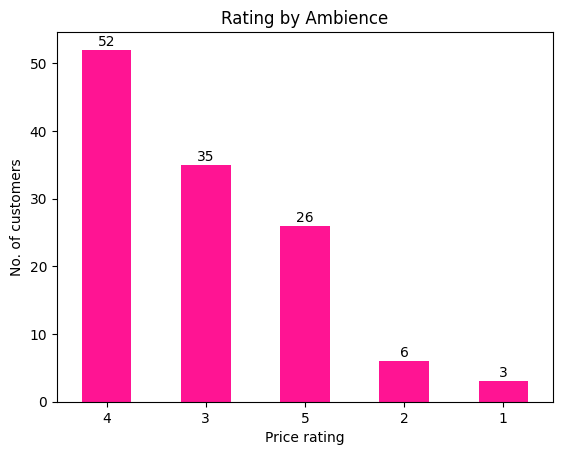

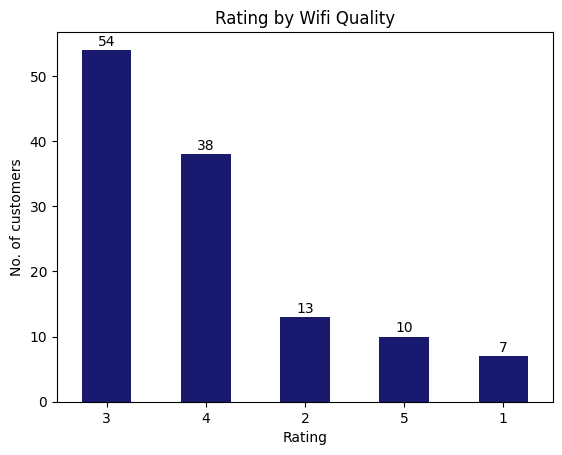

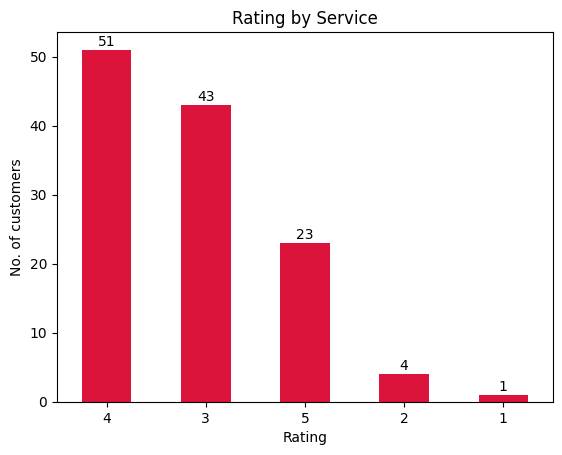

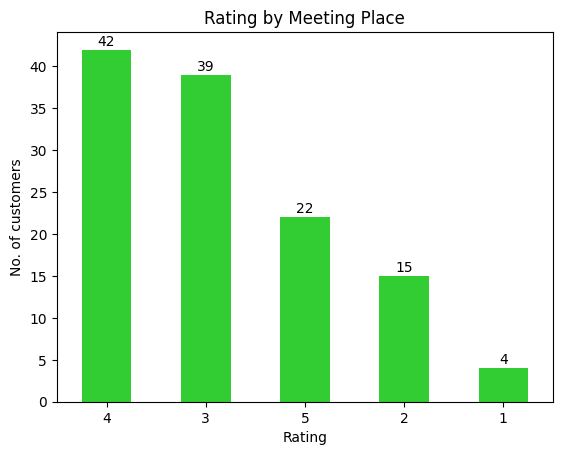

In [36]:
#Customer Rating

# Rating by Quality
ax = plt.axes()
df['rate_quality'].value_counts().plot.bar(color='aqua')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Quality')
plt.xticks(rotation=0)
plt.xlabel('Rating')
plt.ylabel('No. of customers')
plt.show()

# Rating by Price
df['rate_price'].value_counts().plot.bar(color='lawngreen')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Price')
plt.xticks(rotation=0)
plt.xlabel('Price rating')
plt.ylabel('No. of customers')
plt.show()

# Rating by Purchase Decision
ax = plt.axes()
df['purchase_decision'].value_counts().plot.bar(color='bisque')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Purchase Decision')
plt.xticks(rotation=0)
plt.xlabel('rating')
plt.ylabel('No. of customers')
plt.show()

# Rating by ambience
ax = plt.axes()
df['rate_ambience'].value_counts().plot.bar(color='deeppink')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Ambience')
plt.xticks(rotation=0)
plt.xlabel('Price rating')
plt.ylabel('No. of customers')
plt.show()

# Rating by wifi quality
ax = plt.axes()
df['wifi_quality'].value_counts().plot.bar(color='midnightblue')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Wifi Quality')
plt.xticks(rotation=0)
plt.xlabel('Rating')
plt.ylabel('No. of customers')
plt.show()

# Rating by Service
ax = plt.axes()
df['rate_service'].value_counts().plot.bar(color='crimson')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Service')
plt.xticks(rotation=0)
plt.xlabel('Rating')
plt.ylabel('No. of customers')
plt.show()

# Rating by meeting place
ax = plt.axes()
df['rate_meetings'].value_counts().plot.bar(color='limegreen')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.title('Rating by Meeting Place')
plt.xticks(rotation=0)
plt.xlabel('Rating')
plt.ylabel('No. of customers')
plt.show()




*   Most of the customers rate ambiance by 4
*   Most of the customers rate Wifi Quality by 3
*   Most of the customers rate Meeting Place by 4
*   Most of the customers rate quality by 4
*   Most of the customers rate Service by 4
*   Most of the customers rate Price by 3
*   Most of the customers rate Purchase Decision by 4







Bivariate Analysis

In [37]:
df['Yes'] = df['continue_purchase'] == 'Yes'
df['No'] = df['continue_purchase'] == 'No'
purchase_visit = pd.pivot_table(data=df, index='How often do you visit Coffee House?', values=['Yes', 'No'],
               aggfunc = {'Yes':'sum', 'No':'sum'}).reset_index()
purchase_visit

,How often do you visit Coffee House?,No,Yes
0,Daily,0,2
1,Monthly,1,25
2,Never,5,4
3,Rarely,22,54
4,Weekly,0,9


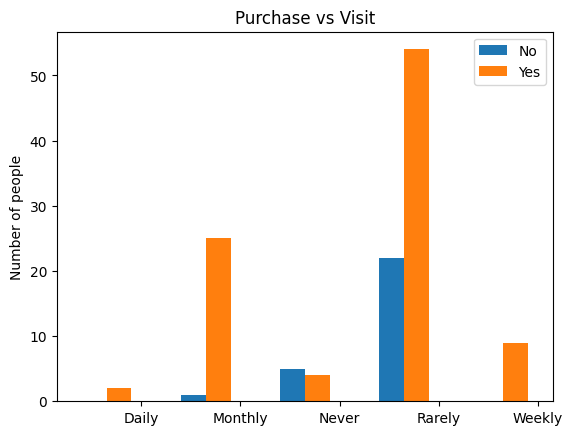

In [38]:
n=5
r = np.arange(n)
width = 0.35
purchase_visit.plot(kind='bar')
plt.ylabel("Number of people")
plt.title("Purchase vs Visit")
plt.xticks(r+width,['Daily','Monthly','Never','Rarely','Weekly'],rotation=0)
plt.legend()

plt.show()

In [39]:
gen_member = pd.pivot_table(data=df, index='membership_card', values=['Yes', 'No'],
               aggfunc = {'Yes':'sum', 'No':'sum'}).reset_index()
gen_member

,membership_card,No,Yes
0,No,23,39
1,Yes,5,55


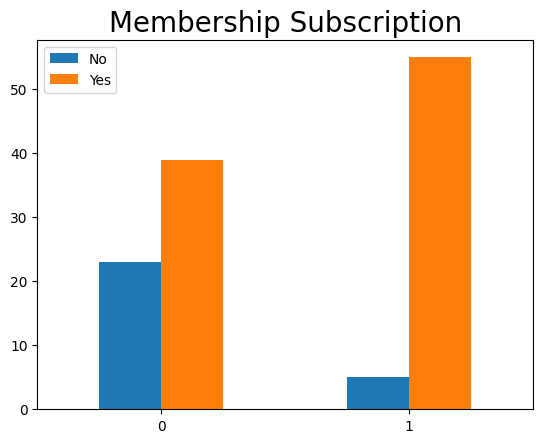

In [40]:
gen_member.plot(kind='bar')
plt.title('Membership Subscription',fontsize=20)
plt.xticks(rotation=0)
plt.xlabel(None)
plt.show()

In [41]:
gender_spend = pd.pivot_table(data=df, index='average_spend', values=['Yes', 'No'],
               aggfunc = {'Yes':'sum', 'No':'sum'}).reset_index()
gender_spend

,average_spend,No,Yes
0,Around RM20 - RM40,3,42
1,Less than RM20,17,41
2,More than RM40,0,7
3,Zero,8,4


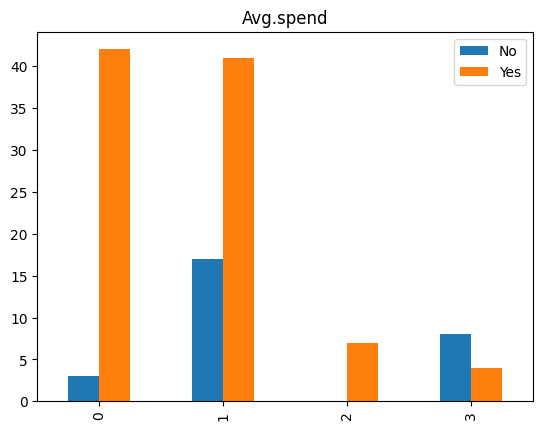

In [42]:
n=5
r = np.arange(n)
width = 0.35
gender_spend.plot(kind='bar')
plt.title('Avg.spend')
for i in ax.containers:
    ax.bar_label(i,padding=1,fontsize=10)
plt.show()

In [43]:
#purchase by quality rating
purchase_qual = pd.pivot_table(data=df, index='rate_quality', values=['Yes', 'No'],
               aggfunc = {'Yes':'sum', 'No':'sum'})

#purchase by price rating
purchase_price = pd.pivot_table(data=df, index='rate_price', values=['Yes', 'No'],
               aggfunc = {'Yes':'sum', 'No':'sum'})

#purchase by purchase decision
purchase_purch = pd.pivot_table(data=df, index='purchase_decision', values=['Yes', 'No'],
               aggfunc = {'Yes':'sum', 'No':'sum'})

#purchase by ambience rating
purchase_amb = pd.pivot_table(data=df, index='rate_ambience', values=['Yes', 'No'],
               aggfunc = {'Yes':'sum', 'No':'sum'})

#purchase by wifi quality
purchase_wifi = pd.pivot_table(data=df, index='wifi_quality', values=['Yes', 'No'],
               aggfunc = {'Yes':'sum', 'No':'sum'})

#purchase by service rating
purchase_service = pd.pivot_table(data=df, index='rate_service', values=['Yes', 'No'],
               aggfunc = {'Yes':'sum', 'No':'sum'})

#purchase by hangout place rating
purchase_hangout = pd.pivot_table(data=df, index='rate_meetings', values=['Yes', 'No'],
               aggfunc = {'Yes':'sum', 'No':'sum'})

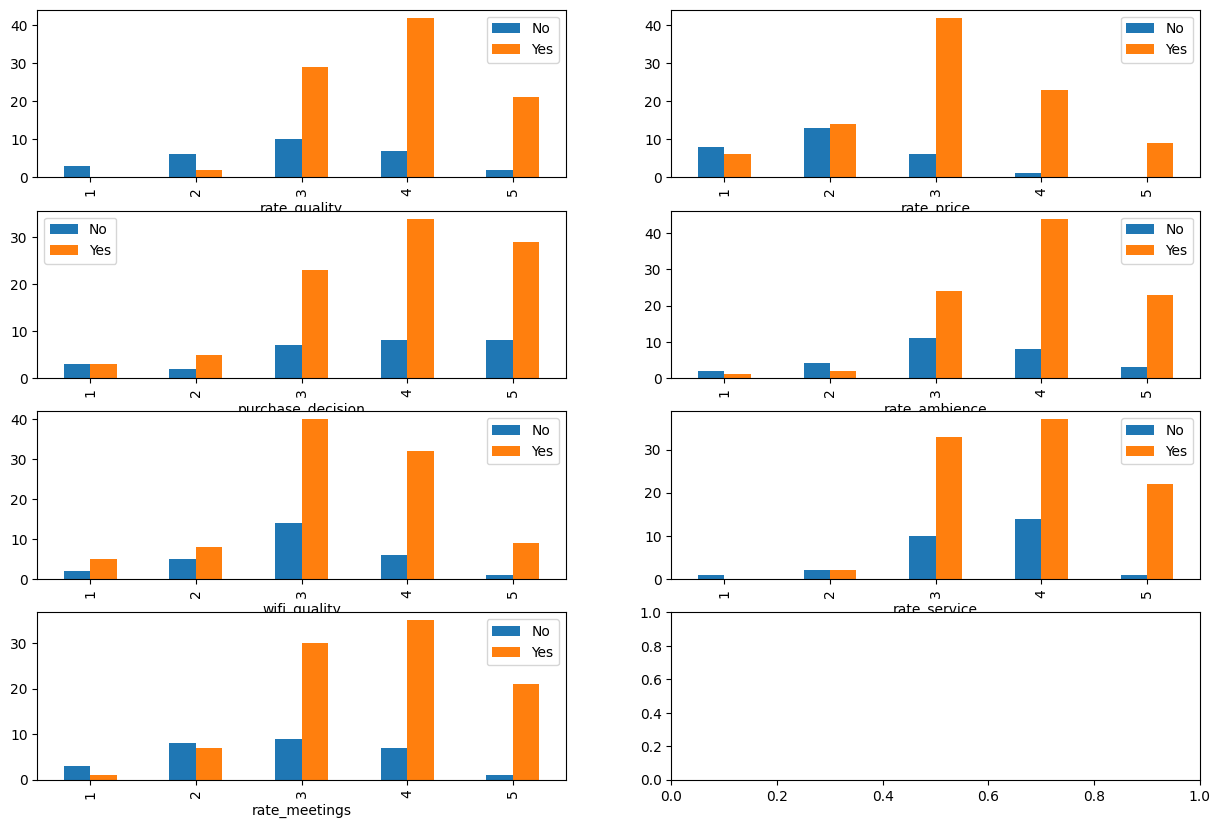

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=2)

purchase_qual.plot(kind='bar',ax=axes[0,0],figsize=(15,10))
purchase_price.plot(kind='bar',ax=axes[0,1],figsize=(15,10))
purchase_purch.plot(kind='bar',ax=axes[1,0])
purchase_amb.plot(kind='bar',ax=axes[1,1])
purchase_wifi.plot(kind='bar',ax=axes[2,0])
purchase_service.plot(kind='bar',ax=axes[2,1])
purchase_hangout.plot(kind='bar',ax=axes[3,0])
plt.show()

Modelling

In [45]:
#df.columns
n


5

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Gender                                  122 non-null    object
 1   Age                                     122 non-null    object
 2   Employment_status                       122 non-null    object
 3   Annual_income                           122 non-null    object
 4   How often do you visit Coffee House?    122 non-null    object
 5   How do you usually enjoy Coffee House?  121 non-null    object
 6   time_spent                              122 non-null    object
 7   nearest_outlet                          122 non-null    object
 8   membership_card                         122 non-null    object
 9   frequent_purchase                       122 non-null    object
 10  average_spend                           122 non-null    object
 11  rate_q

In [60]:
#converting categorical values to numeric
from sklearn.preprocessing import LabelEncoder
columns=['Gender', 'Age', 'Employment_status', 'Annual_income',
       'How often do you visit Coffee House?',
       'How do you usually enjoy Coffee House?', 'time_spent',
       'nearest_outlet', 'membership_card', 'frequent_purchase',
       'average_spend','promotion_hear', 'continue_purchase']
for col in columns:
  labelencoder = LabelEncoder()

  labelencoder.fit(df[col])
  df[col] = labelencoder.transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Gender                                  122 non-null    int64
 1   Age                                     122 non-null    int64
 2   Employment_status                       122 non-null    int64
 3   Annual_income                           122 non-null    int64
 4   How often do you visit Coffee House?    122 non-null    int64
 5   How do you usually enjoy Coffee House?  122 non-null    int64
 6   time_spent                              122 non-null    int64
 7   nearest_outlet                          122 non-null    int64
 8   membership_card                         122 non-null    int64
 9   frequent_purchase                       122 non-null    int64
 10  average_spend                           122 non-null    int64
 11  rate_quality       

In [61]:

#Declaring our X and y variables
X = df.drop('continue_purchase', axis=1)
y = df.continue_purchase

#Train Test Split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#make predictions on our test data
y_pred = classifier.predict(X_test)

#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(f'Accuracy score =: {metrics.accuracy_score(y_test, y_pred)} ')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 0.8 
[[ 1  5]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.79      1.00      0.88        19

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [62]:
#Applying the GridSeachCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X,y)

#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 2
Best n_neighbors: 7


In [63]:
#applying the tuned parameters
#Training
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7,p=2)
classifier.fit(X_train, y_train)

#make predictions on our test data
y_pred = classifier.predict(X_test)

#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(f'Accuracy score =: {metrics.accuracy_score(y_test, y_pred)} ')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 0.8 
[[ 1  5]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.79      1.00      0.88        19

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25

